In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from scipy import signal

%matplotlib inline

In [11]:
# Get all files in the directory
current_path = os.getcwd()
file_names = os.listdir(current_path)

# Get .csv files
csv_files = []
for file in file_names:

    if '.csv' in file:
        csv_files.append(file)

Working with a csv file

In [47]:
# file 1
test_file = csv_files[0]
test_df = pd.read_csv(test_file)

# file 2
test_file_1 = csv_files[2]
test_df_1 = pd.read_csv(test_file)

# Combine all dataframes
test_df = pd.concat([test_df,test_df_1], axis=0, ignore_index=True)

test_df.head()

,Unnamed: 0,date,time,kks,data,unit,duration,dt
0,0,07/19/2023,14:30:00,32_COMP_RAW_PRO_XREL,"[-8.713050842285156, -8.711616516113281, -8.71...",um,1,0.00004
1,1,07/21/2023,14:30:00,32_COMP_RAW_PRO_XREL,"[-8.726463317871094, -8.725486755371094, -8.72...",um,1,0.00004
2,2,07/22/2023,14:30:02,32_COMP_RAW_PRO_XREL,"[-8.762596130371094, -8.765960693359375, -8.76...",um,1,0.00004
3,0,07/19/2023,14:30:00,32_COMP_RAW_PRO_XREL,"[-8.713050842285156, -8.711616516113281, -8.71...",um,1,0.00004
4,1,07/21/2023,14:30:00,32_COMP_RAW_PRO_XREL,"[-8.726463317871094, -8.725486755371094, -8.72...",um,1,0.00004


The Duration of data sample is 1 seconds

sample rate is 25000 Hz

---

In [48]:
print(f'For the file {test_file}:')

# Shape of data
print(f'The shape of the dateframe is {test_df.shape}')

# Extracting data feature
test_data = test_df.data[0]
print(f"Type of the data in DataFrame is {type(test_data)}")
test_data = np.array(eval(test_data))
print(f'data shape is {test_data.shape}', end='\n\n')


For the file test78x.csv:
The shape of the dateframe is (6, 8)
Type of the data in DataFrame is <class 'str'>
data shape is (25000,)



In [86]:
# Extracting all data
all_data = np.zeros((test_df.shape[0],25000))

for i, data in enumerate(test_df.data):

    data = eval(data)
    data = np.array(data).reshape(-1,)
    data = signal.detrend(data) # Detrending the signal
    all_data[i,:] = data

Plot signals

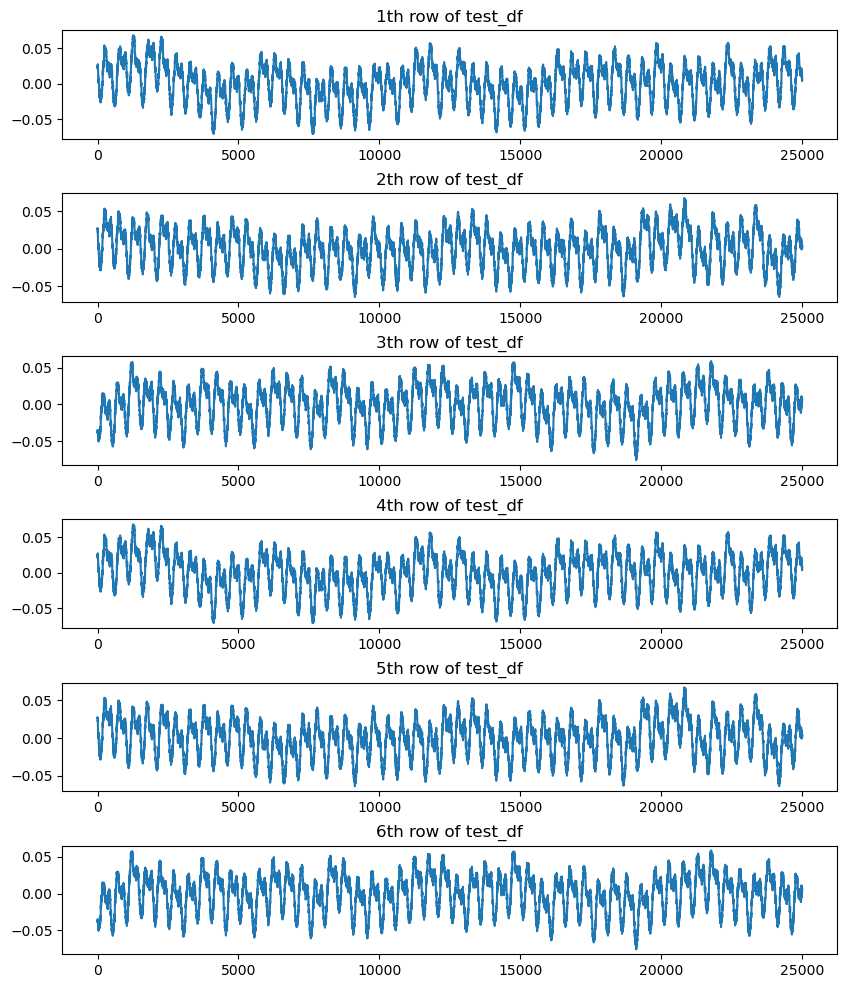

In [87]:
hight = test_df.shape[0]
H = hight * 2
plt.figure(figsize=(10,H))

# Plotting signals
for i in range(hight):

    plt.subplot(hight, 1, i+1)
    plt.plot(all_data[i,:])
    plt.title(f'{i+1}th row of test_df')
plt.subplots_adjust(hspace=0.5)

FFT

In [109]:
def plot_freq (signal):
    lim = 500
    fft_test = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_test)) * 25000
    plt.plot(np.abs(freqs)[:lim], np.abs(fft_test)[:lim])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)


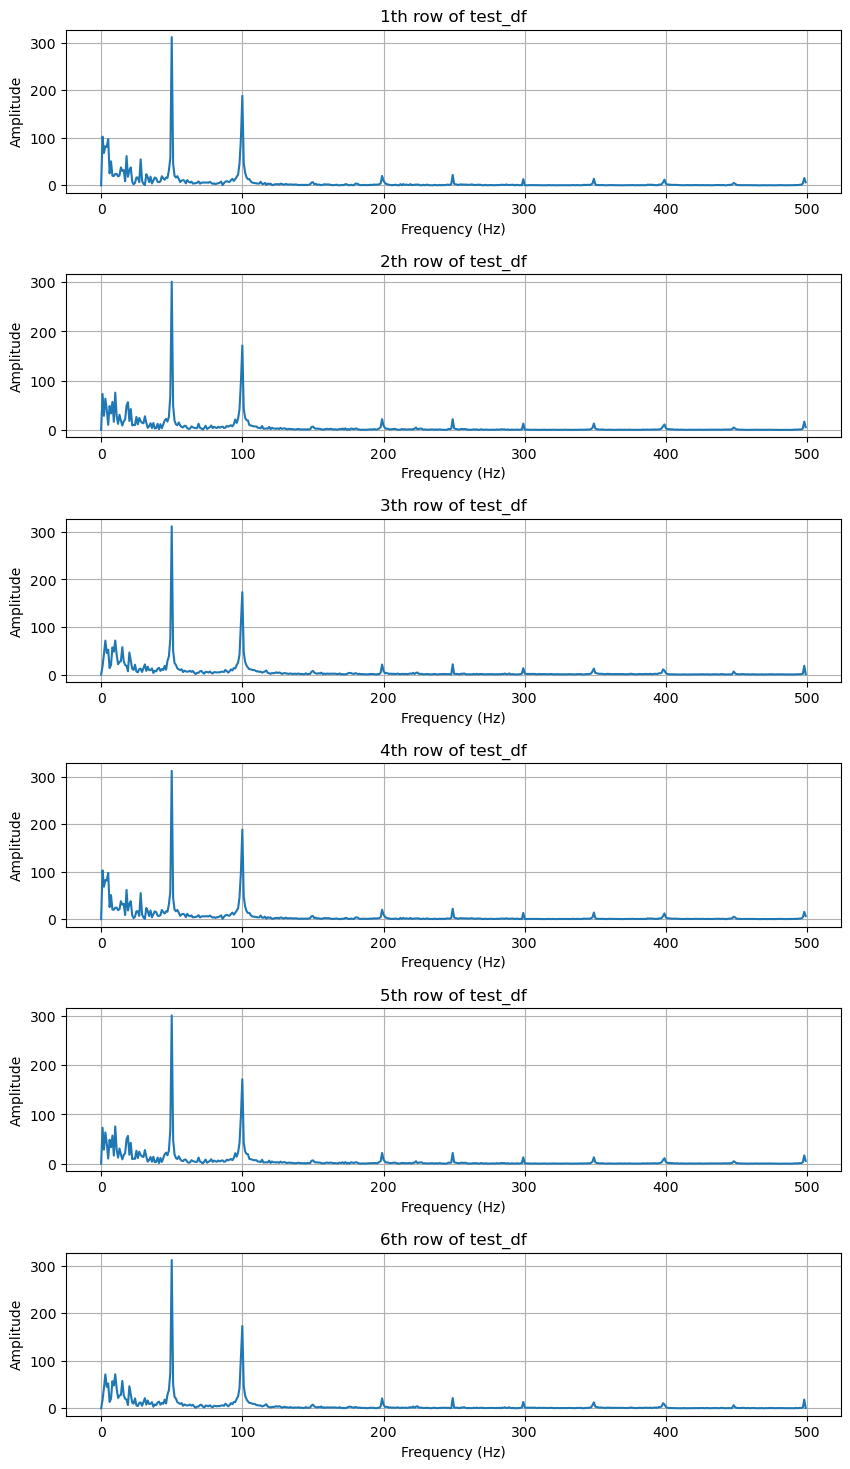

In [110]:
hight = test_df.shape[0]
H = hight * 3
plt.figure(figsize=(10,H))

# Plotting signals
for i in range(hight):

    plt.subplot(hight, 1, i+1)
    plot_freq(all_data[i,:])
    plt.title(f'{i+1}th row of test_df')
plt.subplots_adjust(hspace=0.5)